# Poisson solver 

In [1]:
"""
pyhton
FEniCS tutorial demo program: Poisson equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.

  -Laplace(u) = f    in the unit square
            u = u_D  on the boundary

  u = 1 + x^2 + 2y^2 = u_D
  f = -6

This is an extended version of the demo program poisson.py which
encapsulates the solver as a Python function.
"""

'\npyhton\nFEniCS tutorial demo program: Poisson equation with Dirichlet conditions.\nTest problem is chosen to give an exact solution at all nodes of the mesh.\n\n  -Laplace(u) = f    in the unit square\n            u = u_D  on the boundary\n\n  u = 1 + x^2 + 2y^2 = u_D\n  f = -6\n\nThis is an extended version of the demo program poisson.py which\nencapsulates the solver as a Python function.\n'

In [5]:
from __future__ import print_function
from fenics import *
import numpy as np

In [6]:
def solver(f, u_D, Nx, Ny, degree=1):
    """
    Solve -Laplace(u) = f on [0,1] x [0,1] with 2*Nx*Ny Lagrange
    elements of specified degree and u = u_D (Expresssion) on
    the boundary.
    """

    # Create mesh and define function space
    mesh = UnitSquareMesh(Nx, Ny)
    V = FunctionSpace(mesh, 'P', degree)

    # Define boundary condition
    def boundary(x, on_boundary):
        return on_boundary

    bc = DirichletBC(V, u_D, boundary)

    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    a = dot(grad(u), grad(v))*dx
    L = f*v*dx

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    return u

In [7]:
def run_solver():
    "Run solver to compute and post-process solution"

    # Set up problem parameters and call solver
    u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)
    f = Constant(-6.0)
    u = solver(f, u_D, 8, 8, 1)

    # Plot solution and mesh
    plot(u)
    plot(u.function_space().mesh())

    # Save solution to file in VTK format
    vtkfile = File('poisson_solver/solution.pvd')
    vtkfile << u

In [8]:
def test_solver():
    "Test solver by reproducing u = 1 + x^2 + 2y^2"

    # Set up parameters for testing
    tol = 1E-10
    u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)
    f = Constant(-6.0)

    # Iterate over mesh sizes and degrees
    for Nx, Ny in [(3, 3), (3, 5), (5, 3), (20, 20)]:
        for degree in 1, 2, 3:
            print('Solving on a 2 x (%d x %d) mesh with P%d elements.'
                  % (Nx, Ny, degree))

            # Compute solution
            u = solver(f, u_D, Nx, Ny, degree)

            # Extract the mesh
            mesh = u.function_space().mesh()

            # Compute maximum error at vertices
            vertex_values_u_D = u_D.compute_vertex_values(mesh)
            vertex_values_u  = u.compute_vertex_values(mesh)
            error_max = np.max(np.abs(vertex_values_u_D - \
                                      vertex_values_u))

            # Check maximum error
            msg = 'error_max = %g' % error_max
            assert error_max < tol, msg

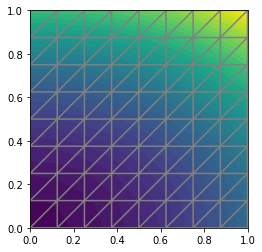

In [9]:
if __name__ == '__main__':
    run_solver()
#    interactive()